In [ ]:
!pip install textblob
!pip install tweepy
!pip install Sastrawi

In [ ]:
import tweepy
from textblob import TextBlob

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk


In [ ]:
consumer_key = "41aIQMly9bUJAkSEGq88XpHDD" #Your API/Consumer key 
consumer_secret = "9peHJuMll65xvND7UfaVcF0g0NKyM5CEXXbC0ZoFCbPbmvdUzn" #Your API/Consumer Secret Key
access_token = "1493212137678061573-y56Gs7lmCJCQfC9pnsKNSfhaPfnJyh"    #Your Access token key
access_token_secret = "8YX6KJ2mfOBTCvSX7IhHVd0ueTzED2EVgVdCSfuNWLR1H" #Your Access token Secret key

#Pass in our twitter API authentication key
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
keyword = input("masukkan topik yang ingin dicari: ")
noOfTweet = int(input("jumlah tweet yang dicari"))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
tweet_list = [tweet.text for tweet in tweets]
df = pd.DataFrame(tweet_list, columns=["text"])


In [ ]:
# processing
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence


In [ ]:
# preprocessing data
df['text_clean'] = df['text'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
df.drop(['text'], axis=1, inplace=True)

df['text_preprocessed'] = df['text_clean'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)
df.drop_duplicates(subset = 'text_clean', inplace = True)
print(df)

                                                                                                                           text_clean  \
0                                                     atau sebaliknya satu jam terbang dekati rp jutaan dan diatas rp jutaan   lewat…   
1                                                                                                                               keren   
2                                       calon presiden  kalau menurut kalian layak jadi presiden ri setelah pak jokowi coba di rituit   
4                 semua rakyat merasakan senang dengan pembangunan yg merata diseluruh nusantara terimakasih pak presiden jokowipres…   
5                                                        pedhet pasti yang salah presiden oleh mereka coba kita lihatturun kan jokowi   
..                                                                                                                                ...   
991                      kepala staf kepr

In [ ]:
df.to_csv("data.csv", index = False, header = True,index_label=None)
df

,text_clean,text_preprocessed
0,atau sebaliknya satu jam terbang dekati rp jutaan dan diatas rp jutaan lewat…,"[jam, terbang, dekat, rp, juta, atas, rp, juta, lewat]"
1,keren,[keren]
2,calon presiden kalau menurut kalian layak jadi presiden ri setelah pak jokowi coba di rituit,"[calon, presiden, layak, presiden, ri, jokowi, coba, rituit]"
4,semua rakyat merasakan senang dengan pembangunan yg merata diseluruh nusantara terimakasih pak presiden jokowipres…,"[rakyat, rasa, senang, bangun, yg, rata, seluruh, nusantara, terimakasih, presiden, jokowipres]"
5,pedhet pasti yang salah presiden oleh mereka coba kita lihatturun kan jokowi,"[pedhet, salah, presiden, coba, lihatturun, jokowi]"
...,...,...
991,kepala staf kepresidenan ksp moeldoko merasa optimistis pembangunan makassar new port mnp di sulawesi selat…,"[kepala, staf, presiden, ksp, moeldoko, optimistis, bangun, makassar, new, port, mnp, sulawesi, selat]"
993,achmadi prabowo akrab amp dukung maju pilkada kpd anak amp mnantu jokowi ini sik gampang nebaknya inilah politik balas budi sp…,"[achmadi, prabowo, akrab, amp, dukung, maju, pilkada, kpd, anak, amp, mnantu, jokowi, sik, gampang, nebaknya, politik, balas, budi, sp]"
994,jokowi panggil paloh ke istana menteri nasdem batal di reshuffle,"[jokowi, panggil, paloh, istana, menteri, nasdem, batal, reshuffle]"
995,ikhtiar untuk desa yang lebih baik jalan tengah …,"[ikhtiar, desa, jalan, ]"


In [ ]:
positive_lexicon = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/sistem-pakar-e21c4.appspot.com/o/lexicon_positive.csv?alt=media&token=cbb94d8e-9431-45c5-ace2-c5353f77495c", index_col=False, header=None)
positive_lexicon = positive_lexicon.set_index(positive_lexicon[0])
positive_lexicon = positive_lexicon[1]
lexicon_positive = positive_lexicon.to_dict()

negative_lexicon = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/sistem-pakar-e21c4.appspot.com/o/lexicon_negative.csv?alt=media&token=e0323098-3090-4372-bfda-3b0266e77f8f", index_col=False, header=None)
negative_lexicon = negative_lexicon.set_index(negative_lexicon[0])
negative_lexicon = negative_lexicon[1]
lexicon_negative = negative_lexicon.to_dict()


In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
  for word in text:
    if (word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity = ''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = "neutral"
    
  return score, polarity

In [ ]:
# Execute code

results = df['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score']= results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())
print(df)

negative    277
positive    223
neutral     133
Name: polarity, dtype: int64
                                                                                                                           text_clean  \
0                                                     atau sebaliknya satu jam terbang dekati rp jutaan dan diatas rp jutaan   lewat…   
1                                                                                                                               keren   
2                                       calon presiden  kalau menurut kalian layak jadi presiden ri setelah pak jokowi coba di rituit   
4                 semua rakyat merasakan senang dengan pembangunan yg merata diseluruh nusantara terimakasih pak presiden jokowipres…   
5                                                        pedhet pasti yang salah presiden oleh mereka coba kita lihatturun kan jokowi   
..                                                                                                   

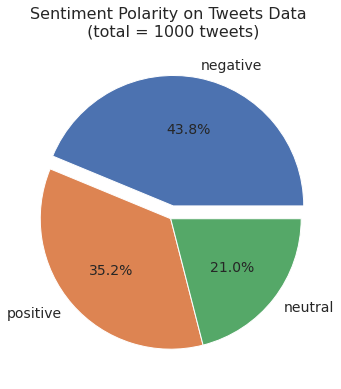

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 1000 tweets)', fontsize = 16, pad = 20)
plt.show()

# Top 10 Positive and Negative Tweet Sentiments

### Positive

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = df[df['polarity'] == "positive"]
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by="polarity_score", ascending=False)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
351,anakkolong pun lagu bergenre pop yg alunannya perempuan banget berjudul kecewa dirilis th amp dipopulerkan oleh bcl ini b…,17,positive
285,k jokowi pastikan akan tetap stop ekspor sda supaya menghasilkan nilai tambah dan lapangan kerja タケシのパラダイス アニポケ キネマ解散 パイレーツ…,14,positive
890,hilirsasi presiden jokowi pada indonesia terus maju dan berkembang harga mati mantap …,13,positive
640,mantap pak presiden jokowi rakyat mendukungmu …,12,positive
781,terimakasih bpk presiden semoga sehat selalu,12,positive
103,jgn ngasih dana hibah kerakyat contoh kambing tp caranya model pinjam terkonsep karna waktu presiden sblm jokowi m…,12,positive
622,• pertama anies memang pilkada gubernur dki melalui caracara tidak terpuji oleh pendukungnya terutama lihat perlakuan…,11,positive
691,analisis kelurahan bertenaga budaya kedaulatan rakyat januari hal …,11,positive
891,keberhasilan kepemimpinan pakde jokowi sukses menggaet para investor mantap …,11,positive
889,kereenn bangga banget dengan presiden jokowi mantap …,11,positive


### Negative

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = df[df['polarity'] == "negative"]
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by="polarity_score", ascending=False)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
832,jokowi maju bersama indonesia kuat,-1,negative
380,menparekraf sandiaga salahuddin uno optimistis upaya indonesia untuk menjadi tuan rumah dan menggelar berbagai ajan…,-1,negative
346,indonesia juga akan menjadi tuan rumah piala dunia bola basket fiba atau fiba world cup kompetisi yang d…,-1,negative
303,jokowi menyampaikan tahun ini diprediksi sebagai tahun yang sulit dan tahun yang sangat menantang namun jokowi mengajak…,-1,negative
899,jokowi maju bersama indonesia kuat …,-1,negative
302,waras dahlan lo mau cium siapajj bolehngak ngaruh seorang kepqla negara l…,-1,negative
109,presiden melakukan peninjauan di tiga titik yakni inlet kali ciliwung di jalan otista titik pertemuan ar…,-1,negative
811,ud mending tutup aj pinjol legal n ilegalkrna tdk bs memperbaiki perekonomian malah memperburukap lg dgn kinerja para dc y…,-1,negative
120,benar kata bang harun anies lah yang lebih dari jokowi buktinya saja jokowi ga bisa menunjukkan ijazah aslinya,-1,negative
121,ikhtiar untuk desa yang lebih baik jalan tengah …,-1,negative
